# Neural Networks and Learning Course
----------------------------------------------------------
# Mushroom Recommender Projet
----------------------------------------------------------
# By Begum SARIGUZEL

#### Importing libraires 

In [196]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn import tree
import graphviz 
%matplotlib inline

#### Loading the data

In [197]:
mushroom = pd.read_csv("mushrooms.csv")


In [198]:
mushroom.drop(['gill-attachment'],axis=1,inplace=True)
mushroom.drop(['veil-color'],axis=1,inplace=True)
mushroom.drop(['ring-number'],axis=1,inplace=True)

In [199]:
mushroom[mushroom.columns] = mushroom[mushroom.columns].astype('category')
target = mushroom['class']

In [200]:
labelen = LabelEncoder()
mushroom_encode = mushroom[mushroom.columns].apply(lambda col: labelen.fit_transform(col))

In [201]:
mushroom.drop(['veil-type'],axis=1,inplace=True)
mushroom_encode.drop(['veil-type'],axis=1,inplace=True)

In [202]:
y = mushroom_encode['class']
mushroom_encode.drop(['class'],axis=1,inplace=True)

#### Creating small data consisted of odorless white spore point color mushrooms

In [204]:
no_odor = mushroom[mushroom['odor'].isin(['n'])]
no_odor_w = no_odor[no_odor['spore-print-color'].isin(['w'])]
(len(mushroom.index) - len(no_odor_w.index)) / len(mushroom.index)

0.9231905465288035

In [205]:
y_no_odor = no_odor_w['class']
y_no_odor

3984    e
4165    e
4276    e
4283    e
4291    e
       ..
8094    e
8096    e
8099    e
8109    e
8111    e
Name: class, Length: 624, dtype: category
Categories (2, object): [e, p]

In [206]:
no_odor_encode = no_odor_w[no_odor_w.columns].apply(lambda col: labelen.fit_transform(col))


In [207]:
y_no_odor = no_odor_encode['class']
no_odor_encode.drop(['class'],axis=1,inplace=True)

In [208]:
column_names_no_odor = no_odor_w.columns
no_odor_w.drop(['class'],axis=1,inplace=True)
no_odor_preprocessed = pd.get_dummies(no_odor_w)


C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Decision tree classifier model

##### Splitting the data for 30% of testing data

In [209]:
X_train, X_test, y_train, y_test = train_test_split(no_odor_preprocessed,y_no_odor, test_size=0.3)

##### Creating the classifier

In [210]:
clf2 = DecisionTreeClassifier()

##### Training the model

In [211]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

##### Accuracy for each depth

In [212]:
for i in range(1,6):
    mad = DecisionTreeClassifier(max_depth=i,random_state=42)
    mad.fit(X_train,y_train)
    y_pred = mad.predict(X_test)
    print("Max depth: {} - accuracy:".format(i), accuracy_score(y_test, y_pred, normalize=True))

Max depth: 1 - accuracy: 0.9361702127659575
Max depth: 2 - accuracy: 0.9840425531914894
Max depth: 3 - accuracy: 0.9893617021276596
Max depth: 4 - accuracy: 0.9893617021276596
Max depth: 5 - accuracy: 1.0


##### Evaluation of the model

In [213]:
print(confusion_matrix(y_test, y_pred))

[[170   0]
 [  0  18]]


##### Visualization of the decision tree

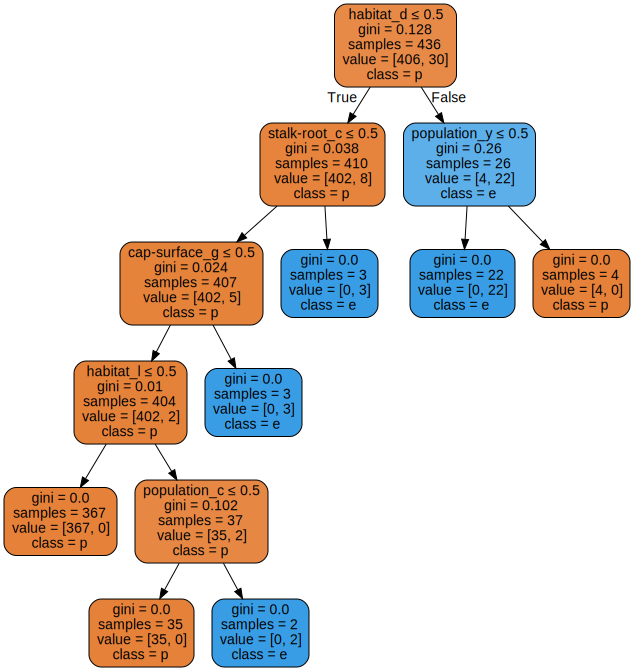

In [214]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=no_odor_preprocessed.columns,  
                         class_names=['p','e'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
#graph.format = 'png'
#graph.render('dtree_render_small_data',view=True)

#### With all data

In [215]:
mushroom.drop(['class'],axis=1,inplace=True)
mushroom_preprocessed = pd.get_dummies(mushroom)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(mushroom_preprocessed,y, test_size=0.3)

In [218]:
clf = DecisionTreeClassifier()

In [219]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

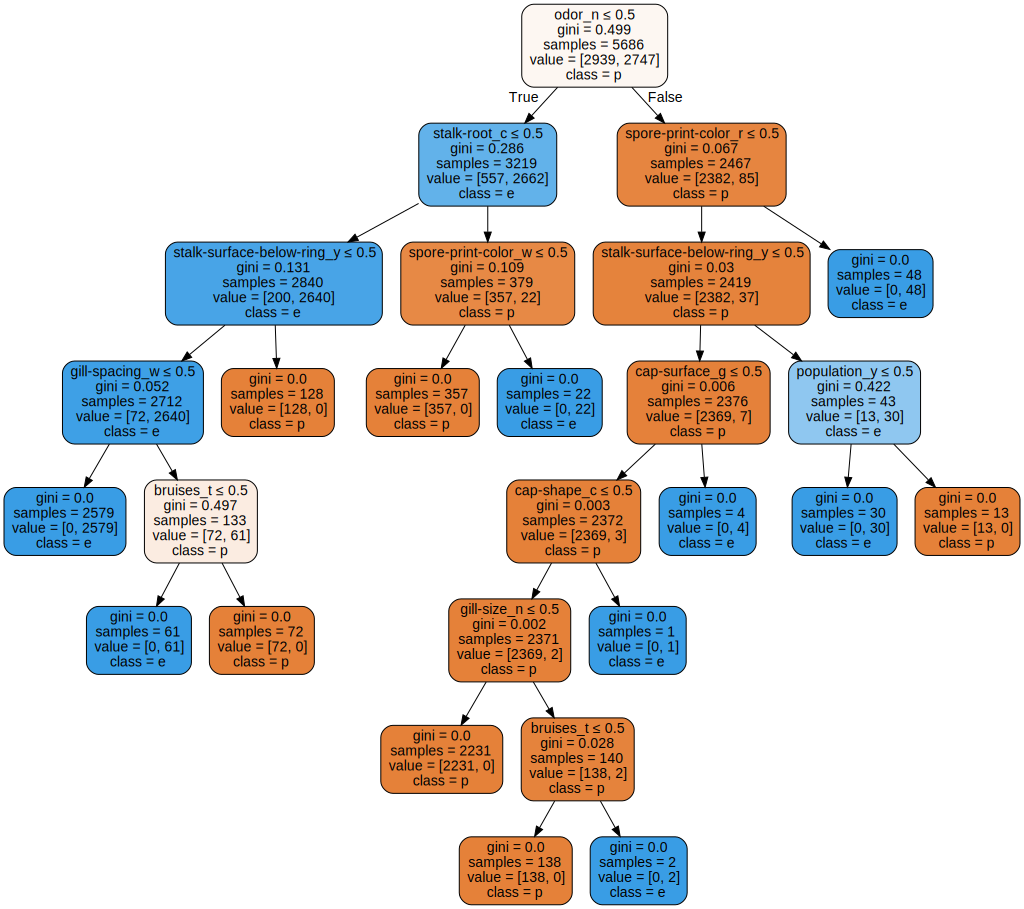

In [220]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=mushroom_preprocessed.columns,  
                         class_names=['p','e'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
#graph.format = 'png'
#graph.render('dtree_render',view=True)

In [221]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                              scores.std()))

mean: 1.000 (std: 0.000)


In [222]:
for i in range(1,6):
    mad = DecisionTreeClassifier(max_depth=i,random_state=42)
    mad.fit(X_train,y_train)
    y_pred = mad.predict(X_test)
    print("Max depth: {} - accuracy:".format(i), accuracy_score(y_test, y_pred, normalize=True))

Max depth: 1 - accuracy: 0.8859721082854799
Max depth: 2 - accuracy: 0.9536505332239541
Max depth: 3 - accuracy: 0.9885151763740772
Max depth: 4 - accuracy: 0.985233798195242
Max depth: 5 - accuracy: 0.9995898277276456


In [223]:
print(confusion_matrix(y_test, y_pred))

[[1269    0]
 [   1 1168]]
